In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

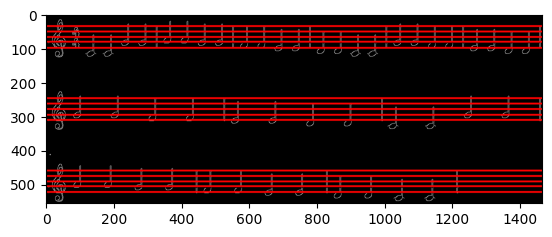

In [3]:
src = cv.imread("Twinkle.png")

dst = cv.Canny(src, 50, 200, None, 3)

cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)

linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

x = []
y = []

for i in range(0, len(linesP)):
    l = linesP[i][0]
    
    if (abs(l[0] - l[2]) <= 1):
        continue
        
    if (x == [] or y == []):
        x.append(l[0])
        y.append(l[1])
    
    if (abs(y[-1] - l[1]) < 1):
        continue
    else:
        x.append(l[0])
        y.append(l[1])

x = np.asarray(x)
y = np.asarray(y)

index = np.argsort(y)
x = x[index]
y = y[index]

diff = np.diff(y)
indices_toKeep = [0]
for i in range(diff.shape[-1]):
    if (diff[i] > 5):
        indices_toKeep.append(i+1)
        
x = x[indices_toKeep]
y = y[indices_toKeep]

for i in range(y.shape[-1]):
    cv.line(cdst, (0, y[i]), (1600, y[i]), (0,0,255), 3, cv.LINE_AA)

_ = plt.imshow(cdst[:,:,(2,1,0)])